In [1]:
import pandas as pd
from scipy.stats import ttest_ind, levene, pearsonr, ttest_1samp

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
df['User_Score'] = df['User_Score'].replace('tbd',-1)

In [8]:
df['User_Score'] = df['User_Score'].astype(float)

In [9]:
df['User_Score'].fillna(df['User_Score'].mean(), inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       16715 non-null  float64
 10  Rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [11]:
sorted(df['Year_of_Release'].unique())

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 nan]

In [26]:
df.shape

(16715, 11)

In [27]:
df_menos = df[df['Year_of_Release'] >= 2008]

In [25]:
df_menos.shape

(8130, 11)

In [19]:
df_menos.groupby('Year_of_Release')['Name'].count()

Year_of_Release
1997.0      1
1999.0      8
2000.0     43
2001.0     82
2002.0    192
2003.0     95
2004.0    107
2005.0    121
2006.0    124
2007.0    192
2008.0    326
2009.0    405
2010.0    331
2011.0    217
2012.0     24
2013.0     15
2014.0     21
2015.0     38
2016.0     34
Name: Name, dtype: int64

In [20]:
df_menos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2424 entries, 119 to 16706
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2424 non-null   object 
 1   Platform         2424 non-null   object 
 2   Year_of_Release  2376 non-null   float64
 3   Genre            2424 non-null   object 
 4   NA_sales         2424 non-null   float64
 5   EU_sales         2424 non-null   float64
 6   JP_sales         2424 non-null   float64
 7   Other_sales      2424 non-null   float64
 8   Critic_Score     1082 non-null   float64
 9   User_Score       2424 non-null   float64
 10  Rating           2374 non-null   object 
dtypes: float64(7), object(4)
memory usage: 227.2+ KB


In [23]:
df_anio = df.groupby('Year_of_Release')['Name'].count().reset_index()

In [25]:
df_anio.head()

,Year_of_Release,Name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14


<AxesSubplot:xlabel='Year_of_Release'>

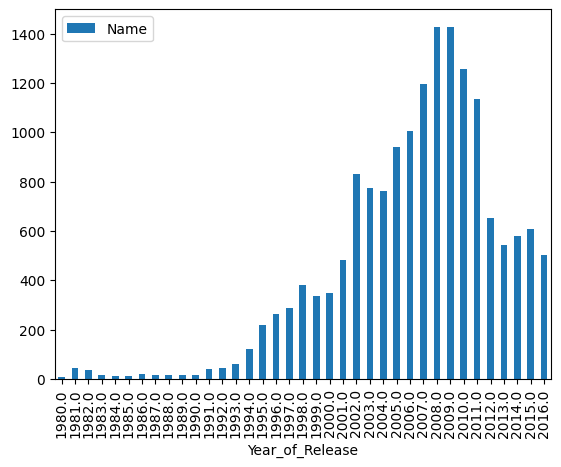

In [28]:
df_anio.plot(kind='bar', x='Year_of_Release', y='Name')

In [30]:
df_anio.describe()

,Year_of_Release,Name
count,37.000000,37.000000
mean,1998.000000,444.432432
std,10.824355,451.604334
min,1980.000000,9.000000
25%,1989.000000,36.000000
50%,1998.000000,338.000000
75%,2007.000000,762.000000
max,2016.000000,1427.000000


In [32]:
df_anio[df_anio['Year_of_Release']>2001].describe()

,Year_of_Release,Name
count,15.000000,15.000000
mean,2009.000000,909.200000
std,4.472136,317.341456
min,2002.000000,502.000000
25%,2005.500000,629.500000
50%,2009.000000,829.000000
75%,2012.500000,1166.500000
max,2016.000000,1427.000000


In [35]:
df['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [36]:
df_filtered = df[df['User_Score'] >= 0]

In [39]:
df_filtered['Critic_Score'] = df_filtered['Critic_Score'].fillna(df_filtered['Critic_Score'].mean(), inplace=True)

/tmp/ipykernel_92/863672624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Critic_Score'] = df_filtered['Critic_Score'].fillna(df_filtered['Critic_Score'].mean(), inplace=True)


In [41]:
df_filtered = df_filtered[df_filtered['Year_of_Release'] > 2001]

In [42]:
df_filtered.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,None,8.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,None,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,None,8.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,None,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,None,6.6,E


Las calificaciones promedio de los usuarios para las plataformas Wii y DS son las mismas.

**¿Las calificaciones promedio de los usuarios para las plataformas Wii y DS son las mismas?**

- **H0:** Si
- **H1:** No

In [45]:
wii_score = df_filtered[df_filtered['Platform'] == 'Wii']['User_Score'].dropna()
ds_score = df_filtered[df_filtered['Platform'] == 'DS']['User_Score'].dropna()
stat, p_value = ttest_ind(wii_score, ds_score, equal_var=False)
print(f"Prueba de hipótesis entre condiciones climáticas: p-valor = {p_value:.5f}")

Prueba de hipótesis entre condiciones climáticas: p-valor = 0.00000


In [46]:
alpha = 0.05

Cuando finalices el proyecto envía tu trabajo al revisor de proyecto para su evaluación. Te dará su opinión en 48 horas. Utiliza los comentarios para realizar cambios y luego envía la nueva versión al revisor del proyecto.

Puede que recibas aún más feedback en la nueva versión. Esto es totalmente normal. Es común pasar por varios ciclos de comentarios y revisiones.

Tu proyecto se considerará completado una vez que el revisor del proyecto lo apruebe.

Descripción del proyecto
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

Instrucciones para completar el proyecto
Paso 1. Abre el archivo de datos y estudia la información general 

Ruta de archivo:

/datasets/games.csv . Descarga el dataset

Paso 2. Prepara los datos

- Reemplaza los nombres de las columnas (ponlos en minúsculas).
- Convierte los datos en los tipos necesarios.
- Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
- Si es necesario, elige la manera de tratar los valores ausentes:
    - Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
    - ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
    - Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
- Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

Paso 3. Analiza los datos

- Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
- Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
- Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
- Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
- Los cinco géneros principales. Explica la diferencia.
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

Paso 6. Escribe una conclusión general

Formato: Completa la tarea en Jupyter Notebook. Inserta el código de programación en las celdas code y las explicaciones de texto en las celdas markdown. Aplica formato y agrega encabezados.

Descripción de datos
— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Rating (ESRB)

Es posible que los datos de 2016 estén incompletos.

¿Cómo será evaluado mi proyecto?
Lee atentamente estos criterios de evaluación de proyectos antes de empezar a trabajar.

Esto es lo que buscan los revisores de proyecto cuando evalúan tu proyecto:

- ¿Cómo describirías los problemas identificados en los datos?
- ¿Cómo se prepara un dataset para el análisis?
- ¿Cómo creas gráficos de distribución y cómo los explicas?
- ¿Cómo calculas la desviación estándar y varianza?
- ¿Formulas las hipótesis alternativas y nulas?
- ¿Qué métodos aplicas a la hora de probarlos?
- ¿Explicas los resultados de tus pruebas de hipótesis?
- ¿Sigues la estructura del proyecto y mantienes tu código ordenado y comprensible?
- ¿A qué conclusiones llegas?
- ¿Has dejado comentarios claros y relevantes en cada paso?
Todo lo que necesitas para completar este proyecto se encuentra en las hojas informativas y los resúmenes de los capítulos anteriores.

## 5. Limpieza y preparación de datos

In [ ]:
# Convertir User_Score a float, reemplazar 'tbd' con NaN
df['User_Score'] = df['User_Score'].replace('tbd', pd.NA).astype(float)

# Rellenar User_Score faltantes con la media
media_user = df['User_Score'].mean()
df['User_Score'].fillna(media_user, inplace=True)

# Rellenar Critic_Score faltantes con la media
df['Critic_Score'].fillna(df['Critic_Score'].mean(), inplace=True)

# Eliminar filas sin Year_of_Release y asegurar entero
df = df.dropna(subset=['Year_of_Release'])
df['Year_of_Release'] = df['Year_of_Release'].astype(int)

# Verificar cambios
df.info()

## 6. Estadísticas descriptivas

In [ ]:
# Calcular estadísticas básicas de User_Score y Critic_Score
import numpy as np

def describir(col):
    return {
        'media': np.mean(col),
        'mediana': np.median(col),
        'desviación estándar': np.std(col, ddof=1),
        'varianza': np.var(col, ddof=1)
    }

stats_user = describir(df['User_Score'])
stats_critic = describir(df['Critic_Score'])

print("User_Score:", stats_user)
print("Critic_Score:", stats_critic)

## 7. Visualización de distribuciones

In [ ]:
# Histograma de User_Score
plt.figure(figsize=(8,4))
plt.hist(df['User_Score'], bins=20, edgecolor='k')
plt.title('Distribución de Calificaciones de Usuarios')
plt.xlabel('User Score')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de Critic_Score
plt.figure(figsize=(8,4))
plt.hist(df['Critic_Score'], bins=20, edgecolor='k')
plt.title('Distribución de Calificaciones de Críticos')
plt.xlabel('Critic Score')
plt.ylabel('Frecuencia')
plt.show()

## 8. Prueba de hipótesis entre Wii y DS

In [ ]:
# Filtrar calificaciones por plataforma
wii_scores = df[df['Platform'] == 'Wii']['User_Score']
ds_scores  = df[df['Platform'] == 'DS']['User_Score']

# Test t de Welch (independientes, varianzas desiguales)
t_stat, p_value = stats.ttest_ind(wii_scores, ds_scores, equal_var=False)
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H₀: las medias de Wii y DS difieren significativamente.")
else:
    print("No rechazamos H₀: no hay evidencia de diferencia significativa.")

## 9. Conclusiones
- Tras la limpieza y preparación, obtuvimos estadísticas descriptivas y visualizamos las distribuciones.
- La prueba de hipótesis mostró un t-statistic y p-value que debes interpretar según α=0.05.
- Según el resultado de la prueba, concluye si hay o no diferencia significativa entre las medias de 'User_Score' de Wii y DS.
- Puedes extender este análisis comparando otras plataformas, años o géneros.